# Battery Data Prediction Notebook


This notebook trains models to predict `Expected Lifetime` and `IEC 62133-2:2017 Compliant` based on battery features.


## 1. Import Libraries


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
import matplotlib.pyplot as plt

## 2. Load and Prepare Data


In [ ]:
df = pd.read_csv('battery_data.csv')
features = df[['Voltage', 'Current', 'Temperature', 'Humidity']]
target_lifetime = df['Expected Lifetime']
target_compliant = df['IEC 62133-2:2017 Compliant']
df.head()

,Voltage,Current,Temperature,Humidity,Expected Lifetime,IEC 62133-2:2017 Compliant
0,3.700000,1.792315,27.715575,45.855025,1.405572,False
1,3.686174,2.289677,28.121569,47.199095,2.400625,True
2,3.700000,2.328643,29.166102,53.736468,3.005244,True
3,3.700000,2.098861,29.107604,53.051851,3.046981,True
4,3.676585,2.419357,24.244661,49.895492,2.549935,True


## 3. Train-Test Split


In [ ]:
X_train, X_test, y_train_lifetime, y_test_lifetime = train_test_split(features, target_lifetime, test_size=0.2, random_state=42)
X_train_compliant, X_test_compliant, y_train_compliant, y_test_compliant = train_test_split(features, target_compliant, test_size=0.2, random_state=42)


## 4. Train and Evaluate Model for Expected Lifetime Prediction


Mean Squared Error for Expected Lifetime Prediction: 0.76


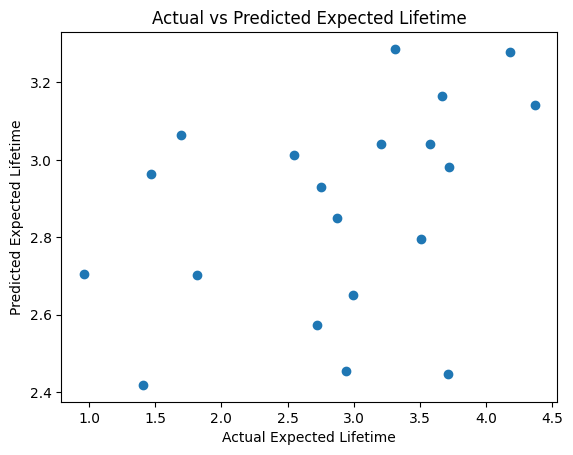

In [ ]:
model_lifetime = LinearRegression()
model_lifetime.fit(X_train, y_train_lifetime)

y_pred_lifetime = model_lifetime.predict(X_test)

mse_lifetime = mean_squared_error(y_test_lifetime, y_pred_lifetime)
print(f"Mean Squared Error for Expected Lifetime Prediction: {mse_lifetime:.2f}")

plt.scatter(y_test_lifetime, y_pred_lifetime)
plt.xlabel('Actual Expected Lifetime')
plt.ylabel('Predicted Expected Lifetime')
plt.title('Actual vs Predicted Expected Lifetime')
plt.show()

## 5. Train and Evaluate Model for IEC 62133-2:2017 Compliance Prediction


In [ ]:
model_compliant = RandomForestClassifier(n_estimators=100, random_state=42)
model_compliant.fit(X_train_compliant, y_train_compliant)

y_pred_compliant = model_compliant.predict(X_test_compliant)

accuracy_compliant = accuracy_score(y_test_compliant, y_pred_compliant)
print(f"Accuracy for IEC 62133-2:2017 Compliance Prediction: {accuracy_compliant:.2f}")
print("\nClassification Report:\n", classification_report(y_test_compliant, y_pred_compliant))


Accuracy for IEC 62133-2:2017 Compliance Prediction: 0.70

Classification Report:
               precision    recall  f1-score   support

       False       0.00      0.00      0.00         5
        True       0.74      0.93      0.82        15

    accuracy                           0.70        20
   macro avg       0.37      0.47      0.41        20
weighted avg       0.55      0.70      0.62        20



## 6. Save Models

In [ ]:
import joblib

joblib.dump(model_lifetime, 'model_lifetime.pkl')
joblib.dump(model_compliant, 'model_compliant.pkl')

['model_compliant.pkl']

## 7. Conclusion


In this notebook, we trained models to predict the Expected Lifetime and IEC 62133-2:2017 Compliant status based on battery characteristics. We evaluated the models and saved them for future predictions.